In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np

In [2]:
#read csv file
summer_df=pd.read_csv('data/summer_gdp2.csv')

In [3]:
summer_df.head()

,id,year,city,sport,discipline,country,gender,event,medal,full_country,gdp
0,29189,2008,Beijing,Wrestling,Wrestling Gre-R,ARM,Men,- 55KG,Bronze,Armenia,1.166204e+10
1,29139,2008,Beijing,Weightlifting,Weightlifting,ARM,Men,85KG,Bronze,Armenia,1.166204e+10
2,29136,2008,Beijing,Weightlifting,Weightlifting,ARM,Men,77KG,Bronze,Armenia,1.166204e+10
3,10696,1964,Tokyo,Aquatics,Swimming,AUS,Women,100M Freestyle,Gold,Australia,2.378766e+10
4,11715,1968,Mexico,Aquatics,Swimming,AUS,Men,100M Freestyle,Gold,Australia,3.268787e+10


In [22]:
#medal count by year for each country
medal_count_df=summer_df.groupby(['country','year','gdp']).count()
medal_count_df=medal_count_df[['medal']]
medal_count_df.rename(columns={'medal':'medal_total'},inplace=True)
medal_count_df.reset_index(inplace=True)
medal_count_df.head()

,country,year,gdp,medal_total
0,AFG,2008,1.019053e+10,1
1,AFG,2012,2.053654e+10,1
2,ALG,1984,5.369828e+10,2
3,ALG,1992,4.800330e+10,2
4,ALG,1996,4.694150e+10,3


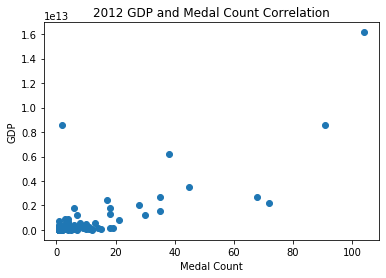

In [26]:
#do an initial look at the data
x=medal_count_df.loc[medal_count_df['year']==2012]['medal_total']
y=medal_count_df.loc[medal_count_df['year']==2012]['gdp']
plt.scatter(x,y)
plt.title('2012 GDP and Medal Count Correlation')
plt.xlabel('Medal Count')
plt.ylabel('GDP')
plt.show()

In [63]:
#create a new row with the Z_score to get rid of of outliers in the GDP data set
medal_count_df_2012=medal_count_df.loc[medal_count_df['year']==2012]
medal_count_df_2012['z_score']=np.abs(stats.zscore(medal_count_df_2012['gdp']))

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
medal_count_df_2012_std=medal_count_df_2012.loc[medal_count_df_2012['z_score']<=2]

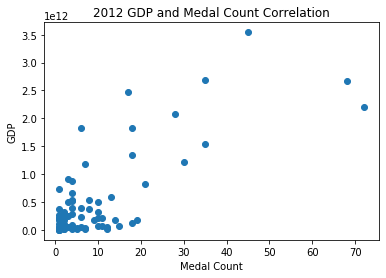

In [70]:
#re-examine data with outliers removed outside of two standard deviations
x=medal_count_df_2012_std['medal_total']
y=medal_count_df_2012_std['gdp']
plt.scatter(x,y)
plt.title('2012 GDP and Medal Count Correlation')
plt.xlabel('Medal Count')
plt.ylabel('GDP')
plt.show()

In [81]:
#finde linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f'r square: {r_value*r_value}')
print(f'p_value: {p_value}')
print(f'std: {medal_count_df_2012_std["gdp"].std()}')
print(f'std_err: {std_err}')

r square: 0.5893311630788749
p_value: 9.812807436446803e-17
std: 743574108585.2167
std_err: 4085845155.7157135


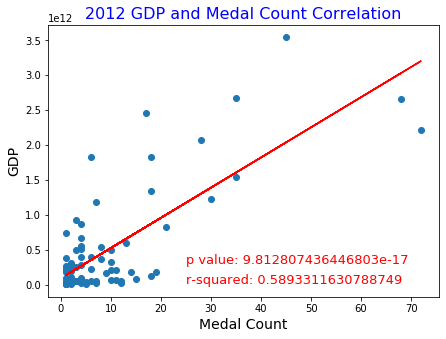

In [182]:
#plot linregress against scatter plot
x2=x*slope+intercept
an1=f'p value: {p_value}'
an2=f'r-squared: {r_value*r_value}'

plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.title('2012 GDP and Medal Count Correlation',fontsize=16,color='blue')
plt.xlabel('Medal Count',fontsize=14)
plt.ylabel('GDP',fontsize=14)
plt.plot(x,x2,'r')
plt.annotate(an1,(25,300000000000),fontsize=13,color="red")
plt.annotate(an2,(25,10000000000),fontsize=13,color="red")
plt.show()

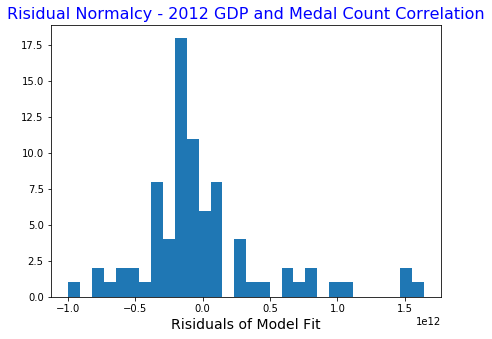

In [184]:
#check risidual normalcy
risiduals=y-x2
plt.figure(figsize=(7,5))
plt.title('Risidual Normalcy - 2012 GDP and Medal Count Correlation',fontsize=16,color='blue')
plt.xlabel('Risiduals of Model Fit',fontsize=14)
plt.hist(risiduals,bins=30)
plt.show()